ChEn-3170: Computational Methods in Chemical Engineering Spring 2021 UMass Lowell; Prof. V. F. de Almeida **27Apr21**

# Laboratory Work 07 (28Apr21)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Jmtrx}{\boldsymbol{\mathsf{J}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Xmtrx}{\boldsymbol{\mathsf{X}}}
  \newcommand{\Kmtrx}{\boldsymbol{\mathsf{K}}}
  \newcommand{\xvec}{\boldsymbol{x}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\gradx}{\nabla\!_{\xvec}}
  \DeclareMathOperator{\partialx}{\partial_\xvec}
  \newcommand{\Kcal}{\mathcal{K}}
  \newcommand{\Kcalvec}{\boldsymbol{\mathcal{K}}}
  \newcommand{\epsvec}{\boldsymbol{\varepsilon}}
$

### Name: `your name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Water-gas shift reaction
 - [1.1)](#a11) Import reaction.
 - [1.2)](#a12) Produce stoichiometric data.
 - [1.3)](#a13) Compute rank.
 - [1.4)](#a14) Compute equilibrium.
 - [1.5)](#a15) Summary of computational method for computing equilibrium.
 - [1.6)](#a16) Compare matrices.
* [Assignment 2 (50 pts)](#a2) CSTR
 - [2.1)](#a21) Model of CSTR
 - [2.2)](#a22) Steady-state concentration
 - [2.3)](#a23) Steady-state heating power.
 - [2.4)](#a24) Cost of heating.
 - [2.5)](#a25) Transient simulation for new inflow conditions
 - [2.6)](#a26) Results analysis
* [Assignment 3 (5 pts)](#a5) Unclear points.
---

## <span style="color:blue">[Assignment 1 (45 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">Compute the equilibrium molar fraction for a model of the water-gas shift reaction (an important means of production of hydrogen) in a closed reactor vessel: see file `data/water-gas-shift-rxn.txt`:</span>

 Water Gas Shift            |         $K_x$        |
--------------------------------|----------------------|
H2O + CO <-> CO2 + H2    | 113.13        |
H2O + H  <-> H2  + OH   | 22.182353        |
 OH  + CO <-> CO2 + H   | 5.1        |
 
### <span style="color:blue"> where $K_x$ is the reaction equilibrium constant based on molar fraction. At some point in time, the charge to the reactor vessel was given:
</span>

| Species | Empirical Formula | Mole Fraction | Value [%] |
|-------------|-----------------|--------------|-------|
|Carbon monoxide    | CO      | $x_\text{CO}$  | 46  |
|Water              | H2O     | $x_\text{H2O}$ | 52  |
|Molecular hydrogen | H2      | $x_\text{H2}$  | 0   |
|Carbon dioxide     | CO2     | $x_\text{CO2}$ | 0   |
|Hydrogen           | H       | $x_\text{H}$   | 1   |
|Hydroxide          | OH      | $x_\text{OH}$  | 1   |

<a id="a11"></a>

### <span style="color:blue">[1.1)](#toa) Import the reaction mechanism.
</span><a id="a11"></a>

In [1]:
'''1.1) Import reaction mechanism'''


### <span style="color:blue">[1.2)](#toa) Make an organized output of the species and stoichiometric data.
</span><a id="a12"></a>

In [2]:
'''1.2) Info on the data'''


species= ['CO', 'OH', 'CO2', 'H2', 'H', 'H2O']

r0 :  H2O + CO <-> CO2 + H2
r1 :  H2O + H  <-> H2  + OH
r2 :  OH  + CO <-> CO2 + H
n_reactions = 3

K_x eq =  [113.13   22.182   5.1  ]


stoic_mtrx=
 [[-1.  0.  1.  1.  0. -1.]
 [ 0.  1.  0.  1. -1. -1.]
 [-1. -1.  1.  0.  1.  0.]]


### <span style="color:blue">[1.3)](#toa) Compute the rank of the stoichiometric matrix using your own algorithm. Is it full rank? Why? </span><a id="a13"></a>

In [3]:
'''1.3) Check the rank of the stoichiometric matrix'''


stoic_mtrx rank = 2


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.4)](#toa) Compute (use your own algorithms) and report the equilibrium mole fractions for all species as follows (values are for your reference) and complete the plots below:</span><a id="a14"></a>
    
      formula      species name    
       xxxx          name              4.376e-01 (43.8%)
       xxxx          name              7.655e-02 ( 7.7%)
       xxxx          name              2.241e-02 ( 2.2%)
       xxxx          name              1.586e-02 ( 1.6%)
       xxxx          name              4.435e-01 (44.3%)
       xxxx          name              4.142e-03 ( 0.4%)

In [13]:
'''1.4) Equilibrium calculation'''




**********************************************************
               Newton's Method Iterations                 
**********************************************************
k | |K(e_k)|  | |K'(e_k)| | |del e_k| |   |e_k|   | convg|
----------------------------------------------------------
 1  +1.127e+02  +6.952e+03  +4.937e-02  +2.726e-01 0.00
 2  +1.077e+02  +7.311e+03  +4.642e-02  +3.144e-01 1.02
 3  +9.353e+01  +8.485e+03  +3.699e-02  +3.486e-01 1.07
 4  +5.886e+01  +1.032e+04  +2.341e-02  +3.705e-01 1.14
 5  +1.418e+01  +1.204e+04  +9.874e-03  +3.798e-01 1.23
 6  +4.558e-01  +1.320e+04  +1.751e-03  +3.814e-01 1.37
 7  +3.971e-04  +1.350e+04  +5.200e-05  +3.815e-01 1.55
 8  +1.317e-08  +1.351e+04  +4.492e-08  +3.815e-01 1.72


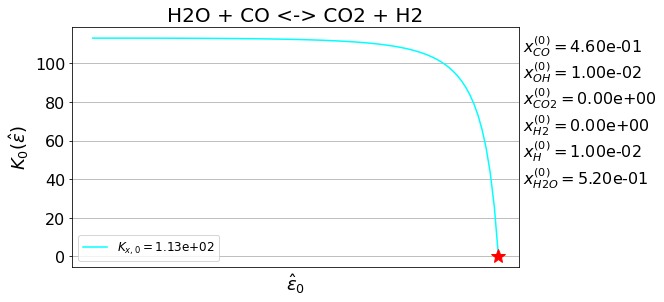

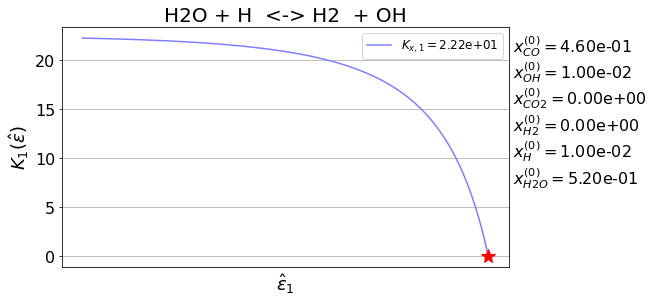

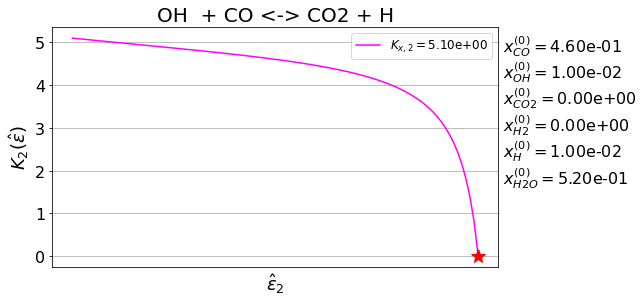

In [15]:
'''1.4) Plot equilibrium vector function and roots'''


### <span style="color:blue">[1.5)](#toa) Provide a summary of key computational steps needed to solve the problem.</span><a id="a15"></a>

#### Key algorithm steps:

### <span style="color:blue">[1.6)](#toa) Compute the matrix obtained from the partial derivative </span>
    
\begin{equation*}
\partial_{\widehat{\epsvec}}\xvec
\end{equation*}

### <span style="color:blue"> and compare to $\Smtrx^\top$. Explain the result.</span><a id="a16"></a>

In [ ]:
'''1.6) Compute molar fraction partial derivative with respect to normalized extent of reaction'''

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (50 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue"> Irreversible first-order endothermic/exothermic reactions</span>

<span style="color:blue">
\begin{equation*}
\text{A} \overset{k_1}{\longrightarrow} 2\,\text{B}, \\
0.3 \,\text{B} \overset{k_2}{\longrightarrow} \text{A} 
\end{equation*}
</span>

### <span style="color:blue"> are performed in a continuous-stirred-tank reactor (CSTR; sketch below). A feed stream containing reactant A enters the constant volume CSTR at a mass flow rate $w$, temperature $T_\text{in}$ and molar concentration $c_\text{Ain}$. The product stream leaves the reactor at a mass flow rate $w$, temperature $T$, and molar concentration $c_\text{A}$ for the reactant and $c_\text{B}$ for the product. The heating power addition rate to the CSTR is $\dot{Q}$, the experimental reaction rates density for the reactions are
</span>

<span style="color:blue">
\begin{align*}
r_1 &= k_1\,c^\alpha_\text{A}  , \\
r_2 &= k_2 \,c^\beta_\text{B}   
\end{align*}
</span>

### <span style="color:blue"> where the rate constants are equal to the Arrhenius equations: $k_i = k_{0_i}\,\exp(\frac{-E}{R\,T})$. Additional parameters for the system are listed below.
</span>
 
 ![](images/cstr.png)
<a id="a2"></a>

## <span style="color:blue"> Input Data</span><a id="data"></a>

|Name                      | Parameter          | Value                | Unit              |
|:-------------------------|:------------------:|:--------------------:|:-----------------:| 
|mass flow rate            | $w$                | 10                   | kg/s              | 
|inflow concentration of A | $c_\text{Ain}$     | 1.2                  | kgmol/$\text{m}^3$| 
|inflow concentration of B | $c_\text{Bin}$     | 0.0                  | kgmol/$\text{m}^3$| 
|inflow temperature        | $T_\text{in}$      | 425                  | K                 | 
|holdup volume             | $V$                | 0.2                  | $\text{m}^3$      | 
|mass density              | $\rho$             | 1000                 | kg/$\text{m}^3$   |
|heat capacity             | $C$                | 4184                 | J/(kg K)          |
|heat of reaction          | $\Delta H_{\text{R}_1}$| $6.69 \times 10^8$   | J/kgmol           |
|heat of reaction          | $\Delta H_{\text{R}_2}$| $-6.69 \times 10^7$   | J/kgmol           |
|Arrhenius frequency       | $k_{0_1}$          | $1.97\times 10^{24}$ | $\text{s}^{-1}$   |
|Arrhenius frequency       | $k_{0_2}$          | $1.97\times 10^{23}$ | $\text{s}^{-1}$   |
|activation temperature    | $E/R$              | 20000                | K                 |
|reaction order            | $\alpha$           | 1.13                 |                   |
|reverse reaction order    | $\beta$            | 0.28                 |                   |
|S.S. reactor temperature  | $T_\text{ss}$      | 350                  | K                 |

In [17]:
'''Parameters'''

w_flow          =   10.0      # kg/s
c_a_in          =   1.2       # kgmol/m^3
c_b_in          =   0.0       # kgmol/m^3
temp_in         =   425.0     # K
volume          =   0.2       # m^3
rho             =   1000.0    # kg/m^3
heat_capacity   =   4184.0    # J/kg/K
enthalpy_rxn_1  =   6.69e8    # J/kgmol
enthalpy_rxn_2  =  -6.69e7    # J/kgmol
k_0_1           =   1.97e24   # 1/s
k_0_2           =   1.97e23   # 1/s
energy_a_over_r =   20000.0   # K
alpha           =   1.13      #
beta            =   0.28      #
temp_ss         =   350.0     # K

In [18]:
'''Parameters dictionary'''

params = dict()

params['w_flow']          =   w_flow
params['c_a_in']          =   c_a_in
params['c_b_in']          =   c_b_in
params['temp_in']         =   temp_in
params['volume']          =   volume
params['rho']             =   rho
params['heat_capacity']   =   heat_capacity
params['enthalpy_rxn_1']  =   enthalpy_rxn_1
params['enthalpy_rxn_2']  =   enthalpy_rxn_2
params['k_0_1']           =   k_0_1
params['k_0_2']           =   k_0_2
params['energy_a_over_r'] =   energy_a_over_r
params['alpha']           =   alpha
params['beta']            =   beta
params['temp_ss']         =   temp_ss

q_flow = w_flow/rho
params['q_flow'] = q_flow
params['tau'] = volume/q_flow

### <span style="color:blue">[2.1)](#toa) Derive a dynamic model for the CSTR to determine the concentrations of reactant A and product B, and the CSTR temperature as a function of time.</span><a id="a21"></a>
</span>  

### Species Mole Balance<a id="smb"></a>

### Energy balance<a id="eb"></a>


In [19]:
'''Stoichiometry'''


stoic_mtrx m x n = (2, 2)
stoic_mtrx rank = 2


### <span style="color:blue">[2.2)](#toa) Determine the steady-state effluent concentrations for reactant A and product B (use your own algorithms).</span><a id="a22"></a>

In [27]:
'''2.2) Steady state concentration'''



c_a_ss = 0.32743 kgmol/m^3
c_b_ss = 3.15375 kgmol/m^3


### <span style="color:blue">[2.3)](#toa) Calculate the required external heating rate in MW for the above conditions. Calculate the chemical heating rate in MW and compare to the external heating rate; explain the difference.</span><a id="a23"></a>

In [28]:
'''2.3) Steady-state heating power'''


Q(S.S.) = 7.68847 [MW]


In [29]:
'''2.3) Steady state chemical heating rate'''


Chemical heating rate = -10.82647 [MW]


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.4)](#toa) If the cost of 1 kWh of electricity in Massachusetts is 22.57 cents, calculate the cost of running the reactor (if heated by electricity) for 1 hour. Is 1 hour a reasonable time to run the reactor?</span><a id="a24"></a>

In [30]:
'''2.4) Cost of running the reactor for 1 hour'''


Electricity cost to run reactor for 1 hour = $1735.29


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.5)](#toa) Using the above steady state condition as an initial condition of the reactor, and keeping the same external heating power, compute the history of the state of the reactor when a change in the inflow stream is made as follows: $c_A = 1.0$ kgmol/cc (lower concentration) $T_\text{in} = 455$ K (higher temperature). Provide a tabular result and a plot as below up to a time when a new steady state has been reached. Explain the transient behavior of the system. What is the probable engineering intention of the new inflow condition?</span><a id="a25"></a>

In [32]:
'''2.5) Transient CSTR behavior'''


       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]
      0.000e+00       3.274e-01       3.154e+00       3.500e+02
      5.025e+00       2.852e-01       3.213e+00       3.516e+02
      1.005e+01       2.723e-01       3.268e+00       3.520e+02
      1.508e+01       2.695e-01       3.312e+00       3.521e+02
      2.010e+01       2.692e-01       3.346e+00       3.521e+02
      2.513e+01       2.695e-01       3.373e+00       3.521e+02
      3.015e+01       2.698e-01       3.394e+00       3.521e+02
      3.518e+01       2.701e-01       3.411e+00       3.521e+02
      4.020e+01       2.704e-01       3.424e+00       3.521e+02
      4.523e+01       2.706e-01       3.433e+00       3.520e+02
      5.025e+01       2.707e-01       3.441e+00       3.520e+02
      5.528e+01       2.708e-01       3.447e+00       3.520e+02
      6.030e+01       2.709e-01       3.452e+00       3.520e+02
      6.533e+01       2.710e-01       3.455e+00       3.520e+02
      7.035e+01       2.711e-01       3.45

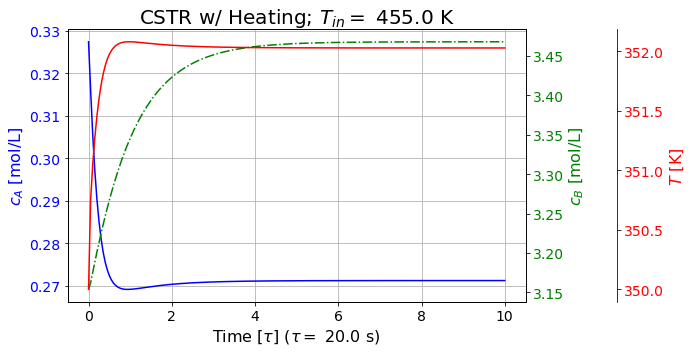

In [33]:
'''1.3 Transient plots'''


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.6)](#toa) Make a tabular comparison of the two steady states previously computed and analyze the results.</span><a id="a26"></a>

#### **Steady-state results analysis:**


## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a5"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>